### IDC DRS DICOM exploration
This notebook is a scratch pad exploring use of the pydicom library as a way of exploring DICOM objects obtained via DRS

Slice Location: 22.80462646


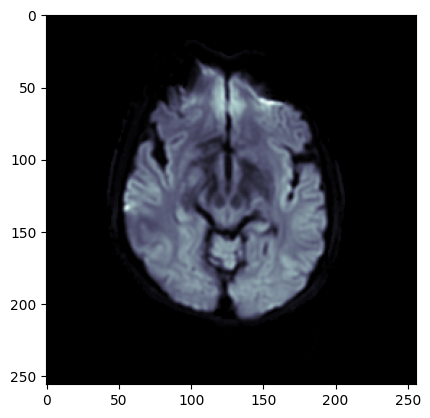

In [7]:
import pydicom as dicom
import matplotlib.pylab as plt

# specify your image path
image_path = '~/NBIA images/TCGA/TCGA-06-0118/1.3.6.1.4.1.9328.50.45.261251313552635776604969350763801739962/000000/000009.dcm'
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array,  cmap=plt.cm.bone)
print (f'Slice Location: {ds.SliceLocation}')

In [8]:
print(f"Patient name: {ds.PatientName}")

Patient name: 282228


In [9]:
ds.dir()

['AccessionNumber',
 'AcquisitionMatrix',
 'AcquisitionNumber',
 'AdditionalPatientHistory',
 'AngioFlag',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'CardiacNumberOfImages',
 'Columns',
 'ContentDate',
 'ContentTime',
 'DeidentificationMethod',
 'DeviceSerialNumber',
 'EchoNumbers',
 'EchoTime',
 'EchoTrainLength',
 'FlipAngle',
 'FrameOfReferenceUID',
 'HeartRate',
 'HighBit',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'ImagedNucleus',
 'ImagingFrequency',
 'InPlanePhaseEncodingDirection',
 'InstanceNumber',
 'InversionTime',
 'Laterality',
 'MRAcquisitionType',
 'MagneticFieldStrength',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'NumberOfAverages',
 'PatientBirthDate',
 'PatientID',
 'PatientIdentityRemoved',
 'PatientName',
 'PatientPosition',
 'PatientSex',
 'PercentPhaseFieldOfView',
 'PercentSampling',
 'PhotometricInterpretation',
 'PixelBandwidth',
 'PixelData',
 'PixelPaddingValue',
 'PixelRepresentation',
 'PixelSpacing',
 '

In [10]:
ds.SeriesDescription

'DTI ASSET'

In [11]:
ds.SOPInstanceUID

'1.3.6.1.4.1.9328.50.45.333429836461230268136053772618210942235'

In [12]:
ds.SliceLocation

'22.80462646'

In [13]:
image_base = '~/NBIA images/TCGA'
series_path = '/TCGA-06-0118/1.3.6.1.4.1.9328.50.45.261251313552635776604969350763801739962/000000'
ds = dicom.dcmread(image_path)

import os
 
# assign directory
directory = f'{image_base}{series_path}'

# set up a sort function on a float value
def getlocation(dsi):
  return float(dsi.SliceLocation)

# iterate over files in
# that directory
instances = []
for filename in os.scandir(directory):
    if filename.is_file():
        dsi = dicom.dcmread(filename.path)
        instances.append(dsi)
instances.sort(key=getlocation)
for i in instances:
    print(i.SliceLocation, i.SOPInstanceUID)

-22.19537354 1.3.6.1.4.1.9328.50.45.138082727975646605976718383660974477660
-17.19537354 1.3.6.1.4.1.9328.50.45.116405227707266649975185060958011563036
-12.19537354 1.3.6.1.4.1.9328.50.45.119320233266430207285425712822555462368
-7.195373535 1.3.6.1.4.1.9328.50.45.199481957520021248370729923471109333443
-2.195373535 1.3.6.1.4.1.9328.50.45.274816342008892072818681861294048339428
2.804626465 1.3.6.1.4.1.9328.50.45.144168716947693226114239291106938855844
7.804626465 1.3.6.1.4.1.9328.50.45.177632602266818822068900763282503680097
12.80462646 1.3.6.1.4.1.9328.50.45.90680057722687506842475502208391458619
17.80462646 1.3.6.1.4.1.9328.50.45.190968913246113742999233344541240902949
22.80462646 1.3.6.1.4.1.9328.50.45.333429836461230268136053772618210942235
27.80462646 1.3.6.1.4.1.9328.50.45.252096040274884106601537280841698480226
32.80462646 1.3.6.1.4.1.9328.50.45.80840980389522335143772499135697997817
37.80462646 1.3.6.1.4.1.9328.50.45.319997197183733444443132137525156451378
42.80462646 1.3.6.1.4.

In [14]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import Image, display
from io import BytesIO

features = {'Free scroll':2,'Start':2, 'Center':6,'Rabbit':9, 'Top':18}
@interact
def show_viewer(slice=widgets.IntSlider(min=0, max=len(instances)-1, step=1, value=2), 
                feature = features.keys()):
    
    if feature != 'Free scroll':
        selected_ds = instances[features[feature]]
        slice = features[feature]
    else:
        selected_ds = instances[slice]
    plt.imshow(selected_ds.pixel_array,  cmap=plt.cm.bone)
    print (f'Slice Location: {selected_ds.SliceLocation}')

interactive(children=(IntSlider(value=2, description='slice', max=25), Dropdown(description='feature', options…

### IDC BigQuery Data Connect
This retrieves IDC DICOM images from the Gen3 DRS server and displays them via pydicom. 

In [15]:
from ipywidgets import IntProgress
from IPython.display import display
max_count = 30

In [44]:
from fasp.search import DataConnectClient
dcClient = DataConnectClient('http://localhost:8089',  
                         debug=False, passport="~/.keys/passport-enc-11.txt")

progress_bar = IntProgress(min=0, max=max_count) # instantiate the bar
display(progress_bar) # display the bar

images = dcClient.run_query('''SELECT  crdc_instance_uuid, gcs_url, SliceLocation
 FROM bigquery_public.idc_v11.dicom_all 
where SeriesInstanceUID = 
'1.3.6.1.4.1.14519.5.2.1.6354.4025.183104519780806394500127974907' '''
                  ,progessIndicator=progress_bar
                  ,return_type='json')

IntProgress(value=0, max=30)

In [ ]:

# Some interesting DICOM inages for testing

# Pathology from TCGA-AA-3524
# 1.3.6.1.4.1.5962.99.1.3239182438.670257845.1639621754982.2.0

# Also pathfrom TCGA-AA-3524
1.3.6.1.4.1.5962.99.1.3229881831.1537023854.1639612454375.2.0

# CT scan - useful
1.3.6.1.4.1.14519.5.2.1.6354.4025.183104519780806394500127974907

#'1.3.6.1.4.1.14519.5.2.1.4591.4001.203709499332852631533323389403

In [45]:
len(images)

26

In [46]:
import tempfile
import requests

def getImage(image):
    url = drs_cl.get_access_url(image['crdc_instance_uuid'])
    with tempfile.NamedTemporaryFile(mode='wb') as file:
        
        response = requests.get(url)
        file.write(response.content)
        file.seek(0)
        #print(f'file name: {file.name}')
        ds = dicom.dcmread(file.name)
        return ds

In [47]:
images[10]

{'crdc_instance_uuid': '52c3d488-0167-40e0-b347-a59df53b9252',
 'gcs_url': 'gs://public-datasets-idc/52c3d488-0167-40e0-b347-a59df53b9252.dcm',
 'SliceLocation': '1'}

https://nci-crdc.datacommons.io/ga4gh/drs/v1/objects/52c3d488-0167-40e0-b347-a59df53b9252/access/gs
<Response [200]>


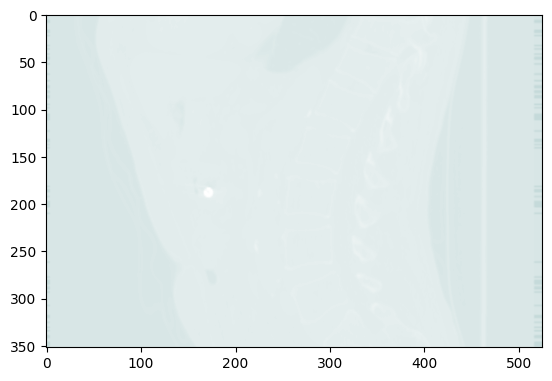

In [51]:
dsv = getImage(images[10])
plt.imshow(dsv.pixel_array,  cmap=plt.cm.bone)

Explore setting the contrast 

(array([184.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

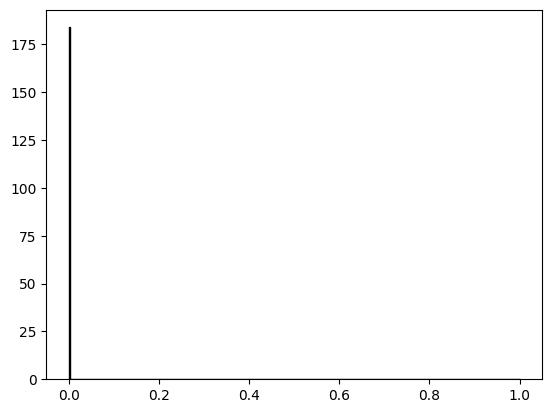

In [52]:
lum_img = dsv.pixel_array[:, 0]
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

In [96]:
dsv.file_meta

(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6354.4025.714385004192263501772101626981
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'

In [92]:
ds = dicom.dcmread('series/350784eb-2489-43cb-9e82-e3a84bb8a3c3.dcm')

FileNotFoundError: [Errno 2] No such file or directory: 'series/350784eb-2489-43cb-9e82-e3a84bb8a3c3.dcm'

In [59]:
ds.dir()

['AccessionNumber',
 'AcquisitionNumber',
 'AcquisitionTime',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ContentDate',
 'ContentTime',
 'DeidentificationMethod',
 'DeidentificationMethodCodeSequence',
 'DerivationCodeSequence',
 'DerivationDescription',
 'EchoNumbers',
 'EchoTime',
 'FrameOfReferenceUID',
 'HighBit',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'InstanceCreationDate',
 'InstanceCreationTime',
 'InstanceNumber',
 'LongitudinalTemporalInformationModified',
 'Modality',
 'PatientBirthDate',
 'PatientID',
 'PatientIdentityRemoved',
 'PatientName',
 'PhotometricInterpretation',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'ReferringPhysicianName',
 'RescaleIntercept',
 'RescaleSlope',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SliceLocation',
 'SliceThickness',
 'StudyDate',
 'StudyID',
 'StudyInstanceUID',
 'StudyTime',
 'TemporalPo

In [60]:
ds.SliceLocation

'1.0'

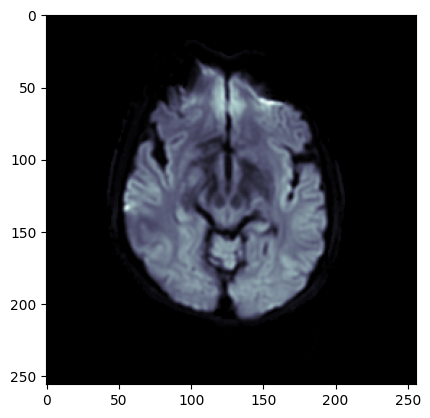

In [91]:
plt.imshow(ds.pixel_array,  cmap=plt.cm.bone)

In [98]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import Image, display
from io import BytesIO

features = {'Free scroll':2,'Start':2, 'Center':6, 'Top':10}
@interact
def show_viewer(slice=widgets.IntSlider(min=0, max=len(instances)-1, step=1, value=2), 
                feature = features.keys()):
    
    if feature != 'Free scroll':
        selected = images[features[feature]]
        slice = features[feature]
    else:
        selected = images[slice]
    image =  getImage(selected)
    plt.imshow(image.pixel_array,  cmap=plt.cm.gray)
    print (f'Slice Location: {image.SliceLocation}')
    pat_name = image.PatientName
    print(f"Patient's Name...: {pat_name.family_comma_given()}")
    print(f"Patient ID.......: {image.PatientID}")
    print(f"Modality.........: {image.Modality}")
    print(f"Study Date.......: {image.StudyDate}")
    print(f"Image size.......: {image.Rows} x {image.Columns}")
    print(f"Pixel Spacing....: {image.PixelSpacing}")


interactive(children=(IntSlider(value=2, description='slice', max=25), Dropdown(description='feature', options…